In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import locale 

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [11]:
locale.setlocale(locale.LC_TIME, "es_ES");

In [3]:
plt.rcParams['figure.figsize'] = (10, 4)

In [4]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    imagesDir = '/home/pvb/Dropbox/Oceanografia/Analisis/SSTGlobalAnalysis/images'
elif os.uname().nodename.lower().find('rossby') != -1:
    imagesDir = '/home/pvb/Analisis/SSTGlobalAnalysis/images'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [5]:
titulo_short = 'GO'
titulo =  'Oceano Global'

#titulo_short = 'NAtl'
#titulo =  'Atlantico Norte'

In [6]:
FileIn =  './data/sstLD_anom_'+titulo_short+'.nc'
FileOut = './images/map_sstd_anom_'+titulo_short+'.png'
Title  = 'Anomalia de temperatura superficial en el '+ titulo

In [7]:
data = xr.open_dataset(FileIn)
sst = data.sst

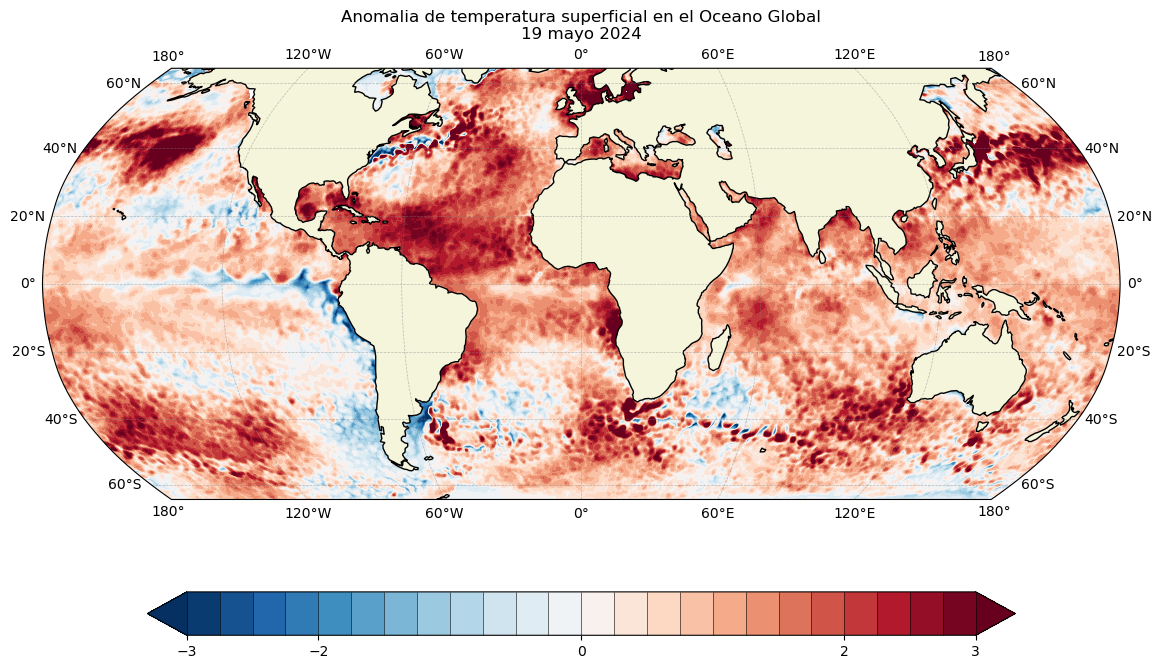

In [14]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

#ax.contour(sst.lon,sst.lat,sst, levels=[2,3], colors='k',
#               transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

plt.savefig(FileOut)

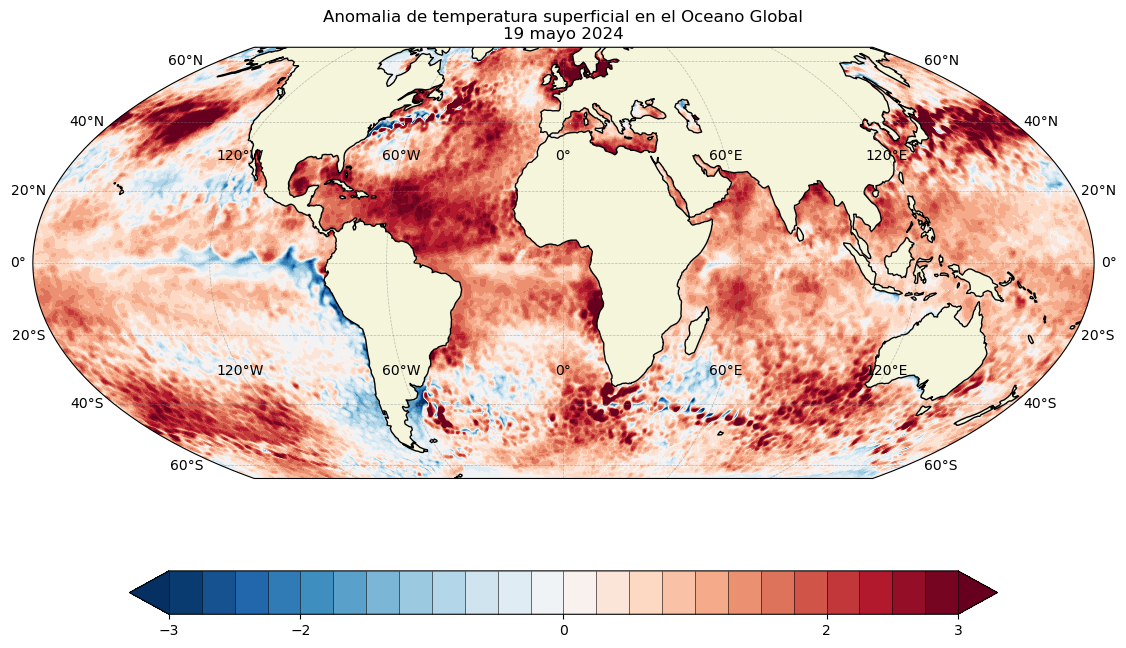

In [9]:
fig = plt.figure(figsize=(14,8))
#ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=0))

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

(array([4.0000e+01, 6.5000e+01, 7.7000e+01, 1.0700e+02, 1.9400e+02,
        2.4500e+02, 3.5100e+02, 4.2500e+02, 5.3300e+02, 7.3400e+02,
        9.8500e+02, 1.4730e+03, 2.2810e+03, 3.4820e+03, 5.4300e+03,
        8.6570e+03, 1.2512e+04, 1.8699e+04, 2.7254e+04, 3.2933e+04,
        4.1229e+04, 4.8723e+04, 5.4909e+04, 5.6016e+04, 5.0755e+04,
        4.1888e+04, 3.4383e+04, 2.6161e+04, 1.9964e+04, 1.6241e+04,
        1.2586e+04, 8.7180e+03, 5.4570e+03, 3.4680e+03, 2.0250e+03,
        1.3370e+03, 1.0770e+03, 9.0300e+02, 7.1600e+02]),
 array([-4.        , -3.79487179, -3.58974359, -3.38461538, -3.17948718,
        -2.97435897, -2.76923077, -2.56410256, -2.35897436, -2.15384615,
        -1.94871795, -1.74358974, -1.53846154, -1.33333333, -1.12820513,
        -0.92307692, -0.71794872, -0.51282051, -0.30769231, -0.1025641 ,
         0.1025641 ,  0.30769231,  0.51282051,  0.71794872,  0.92307692,
         1.12820513,  1.33333333,  1.53846154,  1.74358974,  1.94871795,
         2.15384615,  2.3589

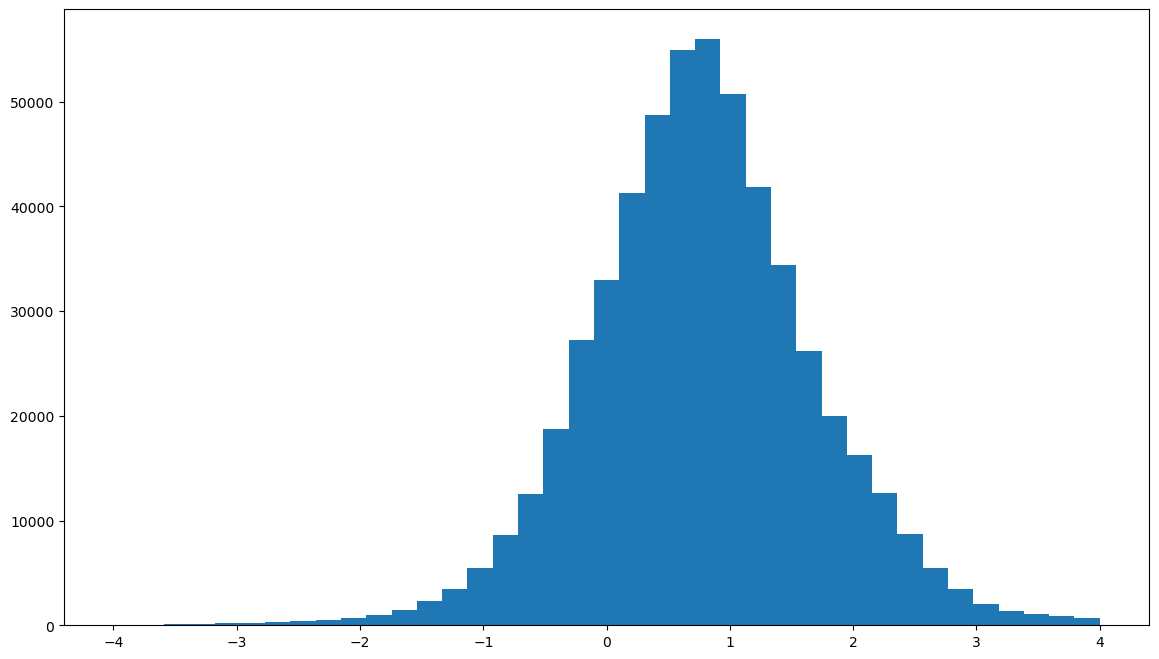

In [10]:
fig , ax = plt.subplots(figsize=(14,8))
ax.hist(sst.values.flatten(),np.linspace(-4, 4, 40))